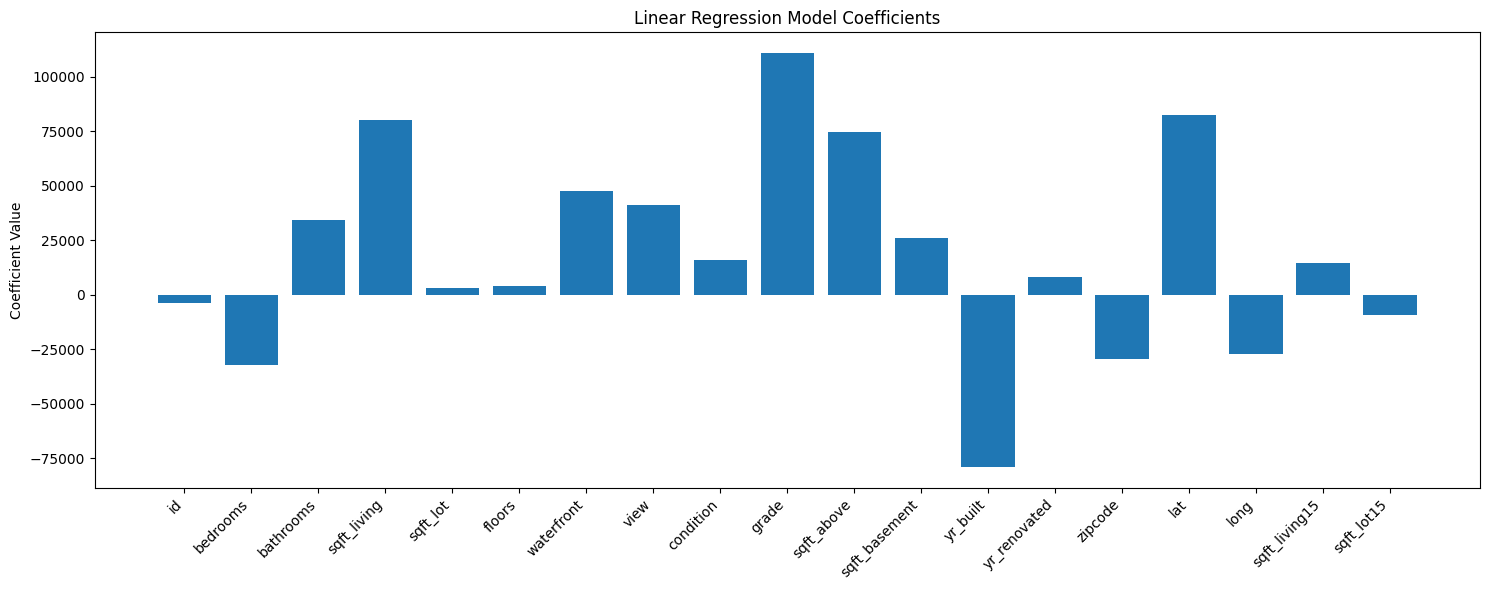

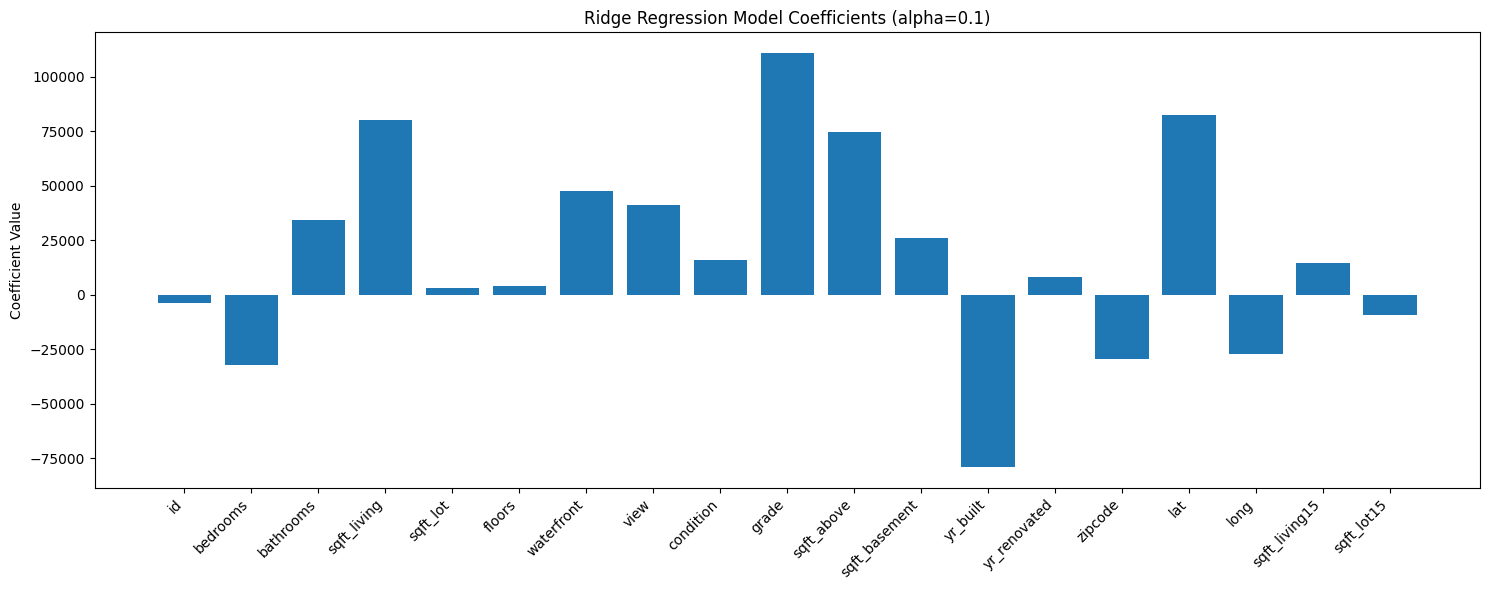

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

# Load the dataset
# Make sure the CSV file 'data_cleaned.csv' is in the same directory or provide the full path.
df = pd.read_csv("Housing.csv")

# Define features (X) and target (y)
# 'date' is dropped as it is non-numeric and 'price' is the target variable.
X = df.drop(['date', 'price'], axis=1)
y = df['price']

# Split the data into training and testing sets BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# This learns the scaling parameters (mean and standard deviation) from the training data only.
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
# This ensures the test data is scaled using the parameters from the training data.
X_test_scaled = scaler.transform(X_test)

# --- Model 1: Linear Regression ---

# Initialize and train the Linear Regression model on the scaled training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Plot the coefficients of the Linear Regression model
plt.figure(figsize=(15, 6))
plt.bar(X.columns, lr.coef_)
plt.xticks(rotation=45, ha='right')
plt.title("Linear Regression Model Coefficients")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()


# --- Model 2: Ridge Regression ---

# Initialize and train the Ridge Regression model on the scaled training data
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Plot the coefficients of the Ridge Regression model
plt.figure(figsize=(15, 6))
plt.bar(X.columns, ridge_model.coef_)
plt.xticks(rotation=45, ha='right')
plt.title("Ridge Regression Model Coefficients (alpha=0.1)")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

In [9]:
y_pred = lr.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
meanab = mean_absolute_error(y_test , y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {meanab}")

Mean Squared Error: 45164797567.24657
Mean absolute Error: 127474.39227865897


In [11]:
# Calculate and print the evaluation metrics for Lasso
y_pred = ridge_model.predict(X_test_scaled)



# --- Model 4: Ridge Regression ---

# The Ridge model was already defined as 'ridge_model' in the previous step.
# If you haven't run that part, you can initialize and train it here:
# ridge_model = Ridge(alpha=0.1)
# ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate and print the evaluation metrics for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("--- Ridge Regression Performance ---")
print(f"Mean Squared Error: {mse_ridge}")
print(f"Mean Absolute Error: {mae_ridge}")

--- Ridge Regression Performance ---
Mean Squared Error: 45164823600.31042
Mean Absolute Error: 127474.19711957042
